# Data Loading

In [287]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score


In [288]:
import pickle

def loadDataPickle(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [289]:
pickleLE = loadDataPickle('WikipediaMovieDatasetLE.pickle')
moviesLE = pd.DataFrame(pickleLE)
moviesLE.head()

,Cast Success Score,Director Success Score,Producer Success Score,Cinematographer Success Score,Runtime,Distributor Success Score,Writer Success Score,Editor Success Score,Production Company Success Score,Release Day,Release Month,Release Year,Age Rating,SentimentScore,Budget,Box Office Status
0,0.491282,1.0,1.000000,1.000000,98,0.370370,1.0,0.666667,0.633333,11,9,2009,5,0.642857,20000000,1
1,-0.027106,0.0,-0.044444,0.090909,100,-0.100000,0.0,-0.666667,0.214286,6,1,2010,3,0.830000,19000000,0
2,-0.240635,0.0,-0.333333,0.000000,89,0.428571,0.0,-0.375000,0.000000,19,10,2009,5,0.780000,18000000,0
3,0.132929,0.0,-0.318182,0.333333,118,-0.154163,0.0,0.000000,-0.380952,15,1,2010,5,0.880000,80000000,0
4,-0.152381,0.0,-0.600000,-0.333333,94,-0.264474,0.0,-0.333333,0.142857,22,12,2009,3,0.580000,28000000,0


In [290]:
pickleOHE = loadDataPickle('WikipediaMovieDatasetOHE.pickle')
moviesOHE = pd.DataFrame(pickleOHE)
moviesOHE.head()

,Cast Success Score,Director Success Score,Producer Success Score,Cinematographer Success Score,Runtime,Distributor Success Score,Writer Success Score,Editor Success Score,Production Company Success Score,Release Day,...,Release Year,SentimentScore,Budget,Age Rating_G,Age Rating_NC-17,Age Rating_Not Rated,Age Rating_PG,Age Rating_PG-13,Age Rating_R,Box Office Status
0,0.491282,1.0,1.000000,1.000000,98,0.370370,1.0,0.666667,0.633333,11,...,2009,0.642857,20000000,0,0,0,0,0,1,1
1,-0.027106,0.0,-0.044444,0.090909,100,-0.100000,0.0,-0.666667,0.214286,6,...,2010,0.830000,19000000,0,0,0,1,0,0,0
2,-0.240635,0.0,-0.333333,0.000000,89,0.428571,0.0,-0.375000,0.000000,19,...,2009,0.780000,18000000,0,0,0,0,0,1,0
3,0.132929,0.0,-0.318182,0.333333,118,-0.154163,0.0,0.000000,-0.380952,15,...,2010,0.880000,80000000,0,0,0,0,0,1,0
4,-0.152381,0.0,-0.600000,-0.333333,94,-0.264474,0.0,-0.333333,0.142857,22,...,2009,0.580000,28000000,0,0,0,1,0,0,0


# Data Prediction

## Label Encoded Data

In [291]:
moviesLE.head()

,Cast Success Score,Director Success Score,Producer Success Score,Cinematographer Success Score,Runtime,Distributor Success Score,Writer Success Score,Editor Success Score,Production Company Success Score,Release Day,Release Month,Release Year,Age Rating,SentimentScore,Budget,Box Office Status
0,0.491282,1.0,1.000000,1.000000,98,0.370370,1.0,0.666667,0.633333,11,9,2009,5,0.642857,20000000,1
1,-0.027106,0.0,-0.044444,0.090909,100,-0.100000,0.0,-0.666667,0.214286,6,1,2010,3,0.830000,19000000,0
2,-0.240635,0.0,-0.333333,0.000000,89,0.428571,0.0,-0.375000,0.000000,19,10,2009,5,0.780000,18000000,0
3,0.132929,0.0,-0.318182,0.333333,118,-0.154163,0.0,0.000000,-0.380952,15,1,2010,5,0.880000,80000000,0
4,-0.152381,0.0,-0.600000,-0.333333,94,-0.264474,0.0,-0.333333,0.142857,22,12,2009,3,0.580000,28000000,0


Splitting The Dataset Into Features And Target Variable

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 1: Split the dataset into features (X) and target variable (Y)
X = moviesLE.drop('Box Office Status', axis=1)
Y = moviesLE['Box Office Status']

# Step 2: Normalize the feature values
scaler = MinMaxScaler()
XNormalized = scaler.fit_transform(X)

# Step 3: Split the dataset into training and testing sets
XTrain, XTemp, YTrain, YTemp = train_test_split(XNormalized, Y, test_size=0.3, random_state=42)

XTest, XVal, YTest, YVal = train_test_split(XTemp, YTemp, test_size=0.2, random_state=42)

In [293]:
print(XTrain.shape, XVal.shape, XTest.shape)

(1232, 15) (106, 15) (423, 15)


### Machine Learning Models

#### Random Forest Classifier

In [294]:
from sklearn.ensemble import RandomForestClassifier

trees = [10, 25, 50, 100, 200]

for tree in trees:
    # Create a Random Forest classifier
    randomForestClassifier = RandomForestClassifier(n_estimators=tree, random_state=42)

    # Train the Random Forest on the training data
    randomForestClassifier.fit(XTrain, YTrain)

    # Predict on the validation set
    YValPredRF = randomForestClassifier.predict(XVal)

    # Evaluate the model on the validation set
    print(f"Random Forest Classifier Accuracy Measures With {tree} No. Of Trees:")
    print(f"F1 Score: {f1_score(YVal, YValPredRF, average='weighted')}")
    print(f"Accuracy: {accuracy_score(YVal, YValPredRF)}")
    print(f"Precision: {precision_score(YVal, YValPredRF, average='weighted')}")
    print(f"Recall: {recall_score(YVal, YValPredRF, average='weighted')}")
    print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredRF)}")
    print('\n')

In [295]:
randomForestClassifier = RandomForestClassifier(n_estimators=100, random_state=42)

randomForestClassifier.fit(XTrain, YTrain)

YTestPredRF = randomForestClassifier.predict(XTest)

print(f"Random Forest Classifier Accuracy Measures On Test Data:")
print(f"F1 Score: {f1_score(YTest, YTestPredRF, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredRF)}")
print(f"Precision: {precision_score(YTest, YTestPredRF, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredRF, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredRF)}")

Random Forest Classifier Accuracy Measures On Test Data:
F1 Score: 0.9716270795345079
Accuracy: 0.9716312056737588
Precision: 0.9716664475952627
Recall: 0.9716312056737588
ROC AUC Score: 0.9714889714106751


#### Decison Tree Classifier

In [296]:
from sklearn.tree import DecisionTreeClassifier

criterions = ['gini', 'entropy']

for criterion in criterions:
    decisionTreeClassifier = DecisionTreeClassifier(criterion=criterion)

    decisionTreeClassifier.fit(XTrain, YTrain)

    YValPredDT = decisionTreeClassifier.predict(XVal)

    print(f"Decision Tree Classifier Accuracy Measures With {criterion} Criterion: ")
    print(f"F1 Score: {f1_score(YVal, YValPredDT, average='weighted')}")
    print(f"Accuracy: {accuracy_score(YVal, YValPredDT)}")
    print(f"Precision: {precision_score(YVal, YValPredDT, average='weighted')}")
    print(f"Recall: {recall_score(YVal, YValPredDT, average='weighted')}")
    print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredDT)}")
    print('\n')

Decision Tree Classifier Accuracy Measures: 
F1 Score: 0.9456137004496016
Accuracy: 0.9456264775413712
Precision: 0.9456961926147546
Recall: 0.9456264775413712
ROC AUC Score: 0.9454051272873697


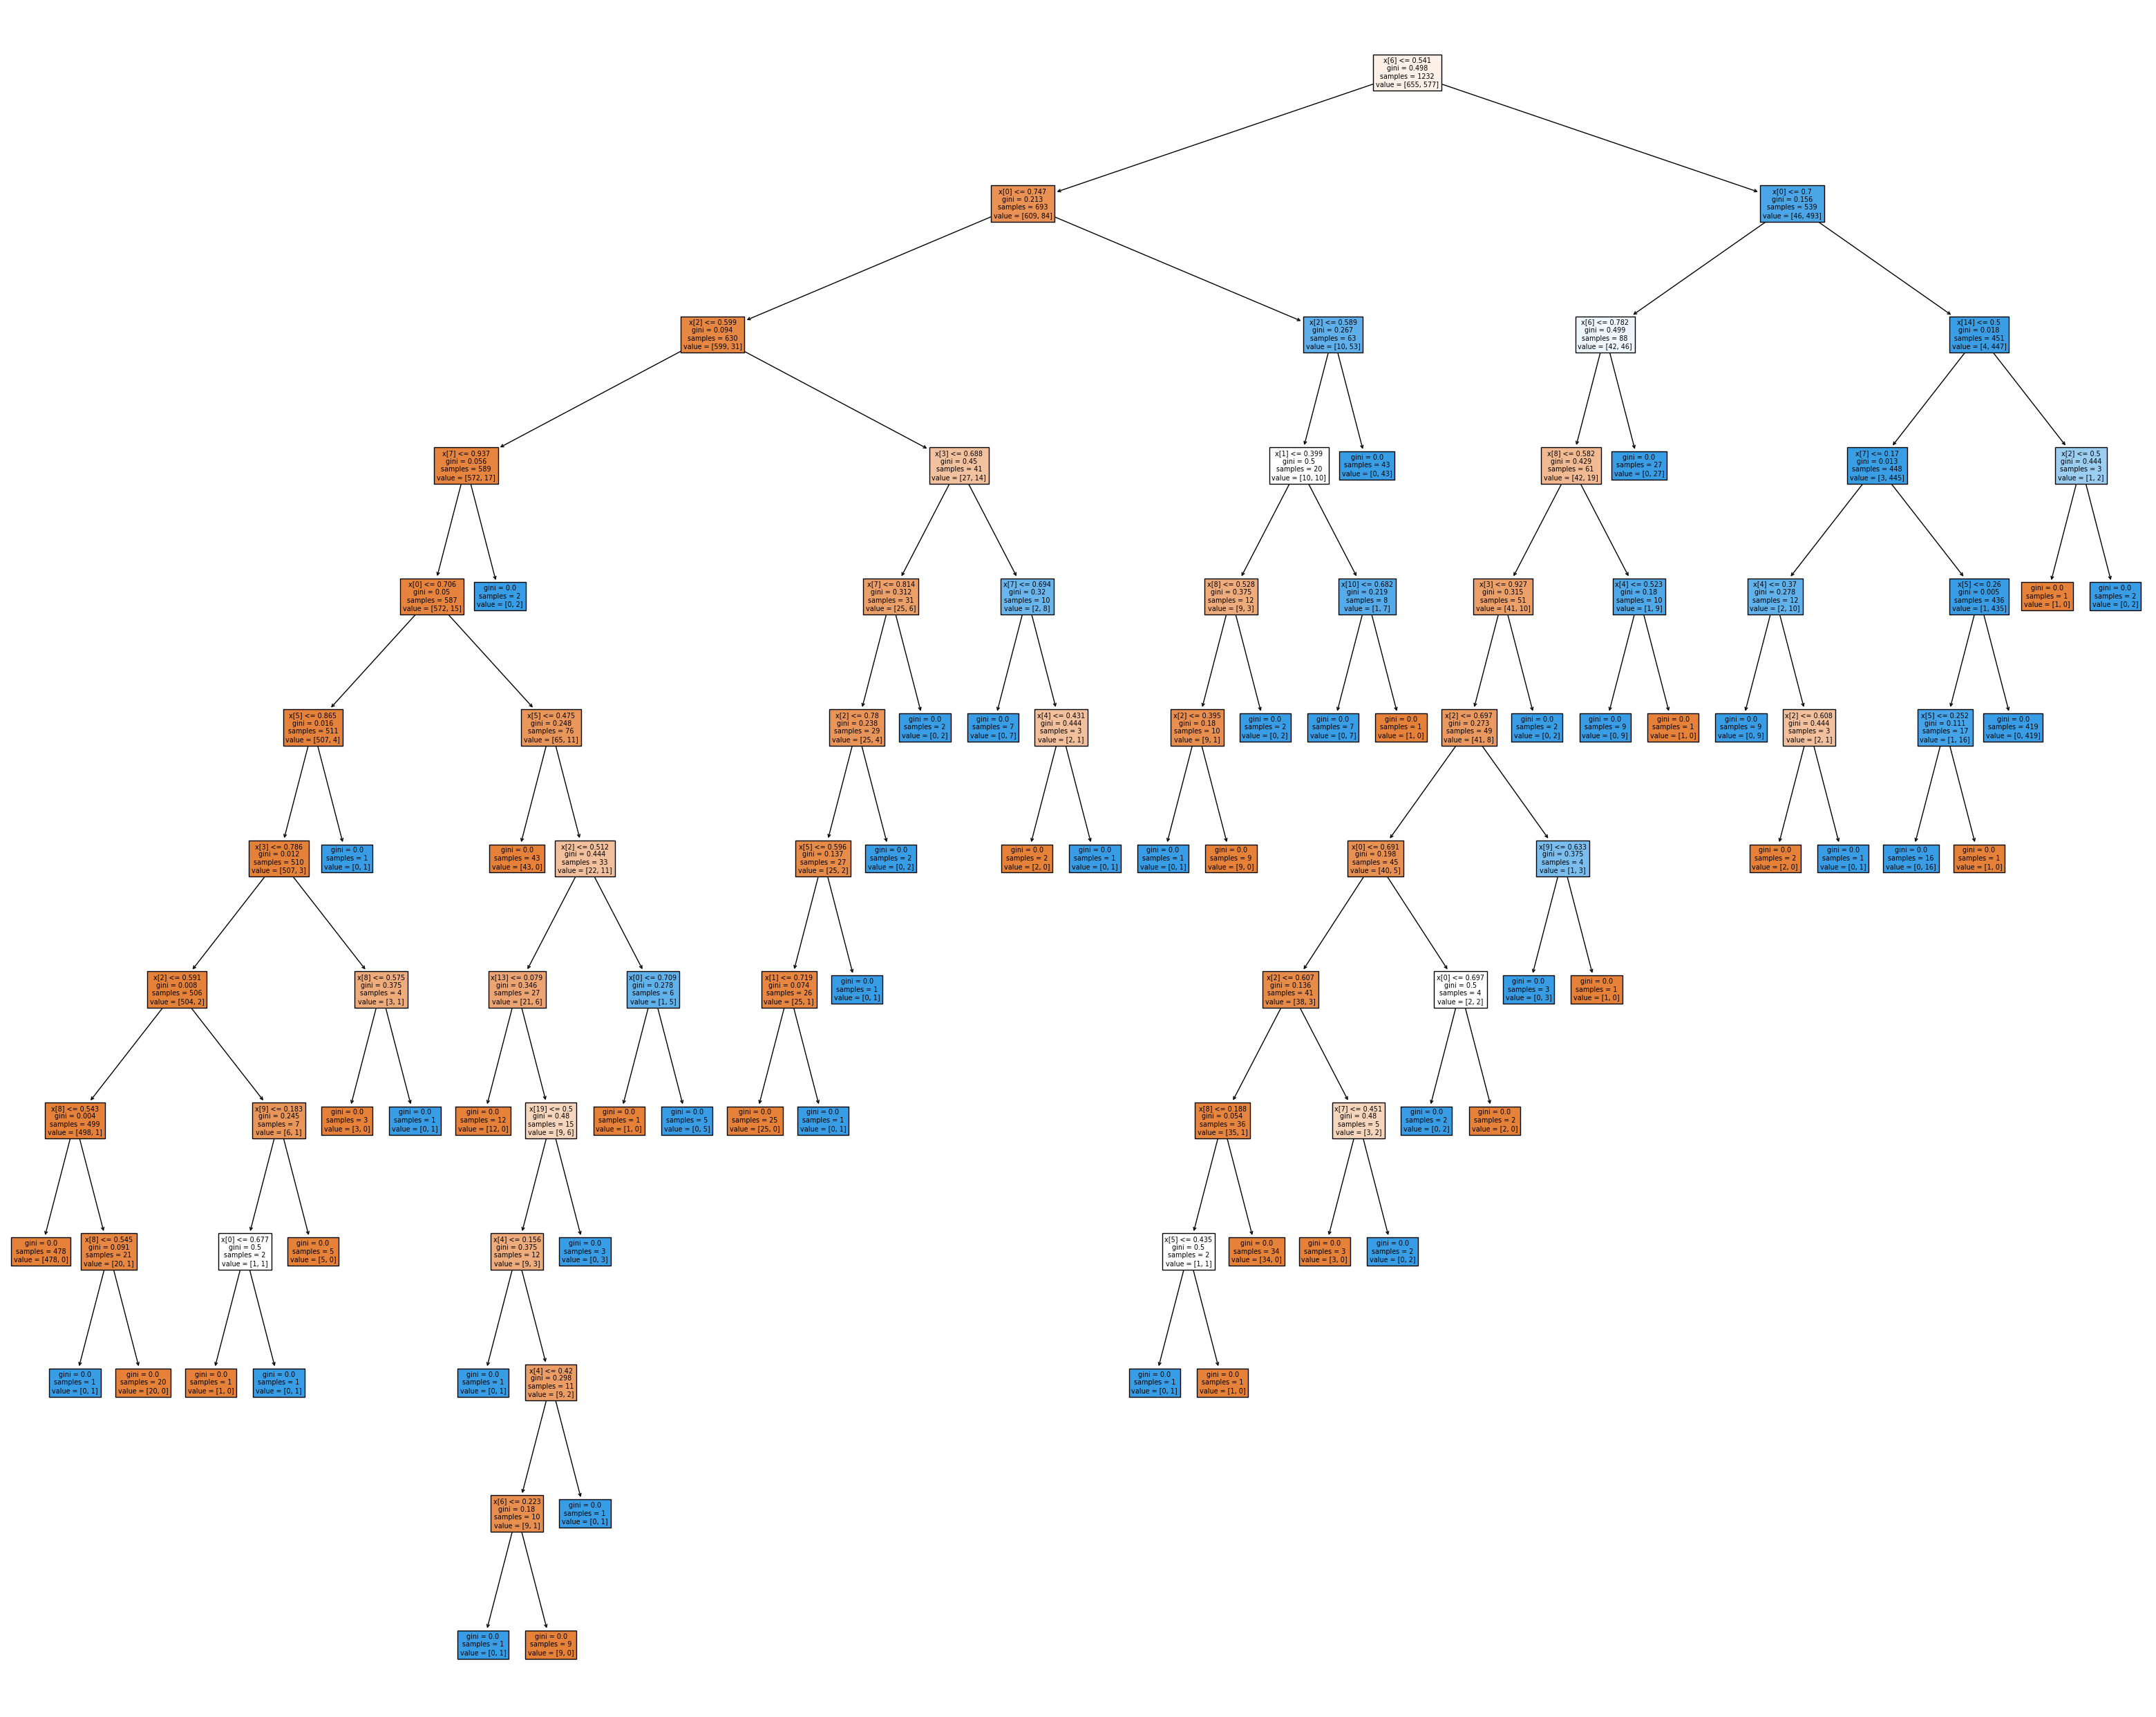

In [322]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

decisionTreeClassifier = DecisionTreeClassifier(criterion='gini')

decisionTreeClassifier.fit(XTrain, YTrain)

YTestPredDT = decisionTreeClassifier.predict(XTest)

print(f"Decision Tree Classifier Accuracy Measures: ")
print(f"F1 Score: {f1_score(YTest, YTestPredDT, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredDT)}")
print(f"Precision: {precision_score(YTest, YTestPredDT, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredDT, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredDT)}")


# Plot The Decision Tree
plt.figure(figsize=(40, 32))
plot_tree(decisionTreeClassifier, filled=True)
plt.show()

#### K-Nearest Neighbors Classifier

In [298]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [5, 10, 15, 20, 30]

# for neighbor in neighbors:
#     knnClassifier = KNeighborsClassifier(n_neighbors=neighbor)

#     knnClassifier.fit(XTrain, YTrain)

#     YValPredKNN = knnClassifier.predict(XVal)

#     # Evaluate the model on the test set
#     print(f'KNN Accuracy Measures For {neighbor} Neighbors')
#     print(f"F1 Score: {f1_score(YVal, YValPredKNN, average='weighted')}")
#     print(f"Accuracy: {accuracy_score(YVal, YValPredKNN)}")
#     print(f"Precision: {precision_score(YVal, YValPredKNN, average='weighted')}")
#     print(f"Recall: {recall_score(YVal, YValPredKNN, average='weighted')}")
#     print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredKNN)}")
#     print('\n')

In [299]:
knnClassifier = KNeighborsClassifier(n_neighbors=5)

knnClassifier.fit(XTrain, YTrain)

YTestPredKNN = knnClassifier.predict(XTest)

# Evaluate the model on the test set
print(f'KNN Accuracy Measures:')
print(f"F1 Score: {f1_score(YTest, YTestPredKNN, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredKNN)}")
print(f"Precision: {precision_score(YTest, YTestPredKNN, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredKNN, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredKNN)}")

KNN Accuracy Measures:
F1 Score: 0.916578888890091
Accuracy: 0.91725768321513
Precision: 0.927416663250386
Recall: 0.91725768321513
ROC AUC Score: 0.915171580689902


#### Logistic Regression

In [300]:
from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# lr.fit(XTrain, YTrain)

# YValPredLR = lr.predict(XVal)

# print('Logistic Regression Accuracy Measures:')
# print(f"F1 Score: {f1_score(YVal, YValPredLR, average='weighted')}")
# print(f"Accuracy: {accuracy_score(YVal, YValPredLR)}")
# print(f"Precision: {precision_score(YVal, YValPredLR, average='weighted')}")
# print(f"Recall: {recall_score(YVal, YValPredLR, average='weighted')}")
# print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredLR)}")
# print('\n')

In [301]:
lr = LogisticRegression()
lr.fit(XTrain, YTrain)

YTestPredLR = lr.predict(XTest)

print('Logistic Regression Accuracy Measures:')
print(f"F1 Score: {f1_score(YTest, YTestPredLR, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredLR)}")
print(f"Precision: {precision_score(YTest, YTestPredLR, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredLR, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredLR)}")
print('\n')

Logistic Regression Accuracy Measures:
F1 Score: 0.9383541146231741
Accuracy: 0.9385342789598109
Precision: 0.9416125949398924
Recall: 0.9385342789598109
ROC AUC Score: 0.9373853518858216




#### Support Vector Classifier

In [302]:
from sklearn.svm import SVC

# kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# for kernel in kernels:
#     svmClassifier = SVC(kernel=kernel)

#     svmClassifier.fit(XTrain, YTrain)

#     YValPredSVM = svmClassifier.predict(XVal)

#     # Evaluate the model on the validation set
#     print(f'SVM Accuracy Measures with {kernel} Kernel:')
#     print(f"F1 Score: {f1_score(YVal, YValPredSVM, average='weighted')}")
#     print(f"Accuracy: {accuracy_score(YVal, YValPredSVM)}")
#     print(f"Precision: {precision_score(YVal, YValPredSVM, average='weighted')}")
#     print(f"Recall: {recall_score(YVal, YValPredSVM, average='weighted')}")
#     print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredSVM)}")
#     print('\n')

In [303]:
svmClassifier = SVC(kernel='rbf')

svmClassifier.fit(XTrain, YTrain)

YTestPredSVM = svmClassifier.predict(XTest)

print(f'SVM Accuracy Measures:')
print(f"F1 Score: {f1_score(YTest, YTestPredSVM, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredSVM)}")
print(f"Precision: {precision_score(YTest, YTestPredSVM, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredSVM, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredSVM)}")
print('\n')

SVM Accuracy Measures:
F1 Score: 0.9550041667705527
Accuracy: 0.9550827423167849
Precision: 0.9567429675820965
Recall: 0.9550827423167849
ROC AUC Score: 0.954252606147376




## One Hot Encoded Data

In [304]:
## Label Encoded Data
moviesOHE.head()

,Cast Success Score,Director Success Score,Producer Success Score,Cinematographer Success Score,Runtime,Distributor Success Score,Writer Success Score,Editor Success Score,Production Company Success Score,Release Day,...,Release Year,SentimentScore,Budget,Age Rating_G,Age Rating_NC-17,Age Rating_Not Rated,Age Rating_PG,Age Rating_PG-13,Age Rating_R,Box Office Status
0,0.491282,1.0,1.000000,1.000000,98,0.370370,1.0,0.666667,0.633333,11,...,2009,0.642857,20000000,0,0,0,0,0,1,1
1,-0.027106,0.0,-0.044444,0.090909,100,-0.100000,0.0,-0.666667,0.214286,6,...,2010,0.830000,19000000,0,0,0,1,0,0,0
2,-0.240635,0.0,-0.333333,0.000000,89,0.428571,0.0,-0.375000,0.000000,19,...,2009,0.780000,18000000,0,0,0,0,0,1,0
3,0.132929,0.0,-0.318182,0.333333,118,-0.154163,0.0,0.000000,-0.380952,15,...,2010,0.880000,80000000,0,0,0,0,0,1,0
4,-0.152381,0.0,-0.600000,-0.333333,94,-0.264474,0.0,-0.333333,0.142857,22,...,2009,0.580000,28000000,0,0,0,1,0,0,0


Splitting The Dataset Into Features And Target Variable

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 1: Split the dataset into features (X) and target variable (Y)
X = moviesOHE.drop('Box Office Status', axis=1)
Y = moviesOHE['Box Office Status']

# Step 2: Normalize the feature values
scaler = MinMaxScaler()
XNormalized = scaler.fit_transform(X)

# Step 3: Split the dataset into training and testing sets
XTrain, XTemp, YTrain, YTemp = train_test_split(XNormalized, Y, test_size=0.3, random_state=42)

XTest, XVal, YTest, YVal = train_test_split(XTemp, YTemp, test_size=0.2, random_state=42)
print(XTrain.shape, XVal.shape, XTest.shape)

(1232, 20) (106, 20) (423, 20)


### Machine Learning Models


#### Random Forest Classifier

In [306]:
from sklearn.ensemble import RandomForestClassifier

# trees = [10, 25, 50, 100, 200]

# for tree in trees:
#     # Create a Random Forest classifier
#     randomForestClassifier = RandomForestClassifier(n_estimators=tree, random_state=42)

#     # Train the Random Forest on the training data
#     randomForestClassifier.fit(XTrain, YTrain)

#     # Predict on the validation set
#     YValPredRF = randomForestClassifier.predict(XVal)

#     # Evaluate the model on the validation set
#     print(f"Random Forest Classifier Accuracy Measures With {tree} No. Of Trees:")
#     print(f"F1 Score: {f1_score(YVal, YValPredRF, average='weighted')}")
#     print(f"Accuracy: {accuracy_score(YVal, YValPredRF)}")
#     print(f"Precision: {precision_score(YVal, YValPredRF, average='weighted')}")
#     print(f"Recall: {recall_score(YVal, YValPredRF, average='weighted')}")
#     print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredRF)}")
#     print('\n')

In [307]:
randomForestClassifier = RandomForestClassifier(n_estimators=100, random_state=42)

randomForestClassifier.fit(XTrain, YTrain)

YTestPredRF = randomForestClassifier.predict(XTest)

print(f"Random Forest Classifier Accuracy Measures:")
print(f"F1 Score: {f1_score(YTest, YTestPredRF, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredRF)}")
print(f"Precision: {precision_score(YTest, YTestPredRF, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredRF, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredRF)}")

Random Forest Classifier Accuracy Measures:
F1 Score: 0.9598131220539315
Accuracy: 0.9598108747044918
Precision: 0.9598261021840013
Recall: 0.9598108747044918
ROC AUC Score: 0.9598451970829045


#### Decison Tree Classifier

In [308]:
from sklearn.tree import DecisionTreeClassifier

# criterions = ['gini', 'entropy']

# for criterion in criterions:
#     decisionTreeClassifier = DecisionTreeClassifier(criterion=criterion)

#     decisionTreeClassifier.fit(XTrain, YTrain)

#     YValPredDT = decisionTreeClassifier.predict(XVal)

#     print(f"Decision Tree Classifier Accuracy Measures With {criterion} Criterion: ")
#     print(f"F1 Score: {f1_score(YVal, YValPredDT, average='weighted')}")
#     print(f"Accuracy: {accuracy_score(YVal, YValPredDT)}")
#     print(f"Precision: {precision_score(YVal, YValPredDT, average='weighted')}")
#     print(f"Recall: {recall_score(YVal, YValPredDT, average='weighted')}")
#     print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredDT)}")
#     print('\n')

In [309]:
decisionTreeClassifier = DecisionTreeClassifier(criterion='entropy')

decisionTreeClassifier.fit(XTrain, YTrain)

YTestPredDT = decisionTreeClassifier.predict(XTest)

print(f"Decision Tree Classifier Accuracy Measures: ")
print(f"F1 Score: {f1_score(YTest, YTestPredDT, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredDT)}")
print(f"Precision: {precision_score(YTest, YTestPredDT, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredDT, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredDT)}")

Decision Tree Classifier Accuracy Measures: 
F1 Score: 0.950332381437892
Accuracy: 0.950354609929078
Precision: 0.9505763305382231
Recall: 0.950354609929078
ROC AUC Score: 0.9500134222182453


#### K-Nearest Neighbors Classifier

In [310]:
from sklearn.neighbors import KNeighborsClassifier

# neighbors = [5, 10, 15, 20, 30]

# for neighbor in neighbors:
#     knnClassifier = KNeighborsClassifier(n_neighbors=neighbor)

#     knnClassifier.fit(XTrain, YTrain)

#     YValPredKNN = knnClassifier.predict(XVal)

#     # Evaluate the model on the test set
#     print(f'KNN Accuracy Measures For {neighbor} Neighbors')
#     print(f"F1 Score: {f1_score(YVal, YValPredKNN, average='weighted')}")
#     print(f"Accuracy: {accuracy_score(YVal, YValPredKNN)}")
#     print(f"Precision: {precision_score(YVal, YValPredKNN, average='weighted')}")
#     print(f"Recall: {recall_score(YVal, YValPredKNN, average='weighted')}")
#     print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredKNN)}")
#     print('\n')

In [311]:
knnClassifier = KNeighborsClassifier(n_neighbors=5)

knnClassifier.fit(XTrain, YTrain)

YTestPredKNN = knnClassifier.predict(XTest)

# Evaluate the model on the test set
print(f'KNN Accuracy Measures:')
print(f"F1 Score: {f1_score(YTest, YTestPredKNN, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredKNN)}")
print(f"Precision: {precision_score(YTest, YTestPredKNN, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredKNN, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredKNN)}")

KNN Accuracy Measures:
F1 Score: 0.9022781269855351
Accuracy: 0.9030732860520094
Precision: 0.912815589171757
Recall: 0.9030732860520094
ROC AUC Score: 0.9009775848955303


#### Linear Regression

In [312]:
from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# lr.fit(XTrain, YTrain)

# YValPredLR = lr.predict(XVal)

# print('Linear Regression Accuracy Measures:')
# print(f"F1 Score: {f1_score(YVal, YValPredLR, average='weighted')}")
# print(f"Accuracy: {accuracy_score(YVal, YValPredLR)}")
# print(f"Precision: {precision_score(YVal, YValPredLR, average='weighted')}")
# print(f"Recall: {recall_score(YVal, YValPredLR, average='weighted')}")
# print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredLR)}")
# print('\n')

In [313]:
lr = LogisticRegression()
lr.fit(XTrain, YTrain)

YTestPredLR = lr.predict(XTest)

print('Logistic Regression Accuracy Measures:')
print(f"F1 Score: {f1_score(YTest, YTestPredLR, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredLR)}")
print(f"Precision: {precision_score(YTest, YTestPredLR, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredLR, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredLR)}")
print('\n')

Logistic Regression Accuracy Measures:
F1 Score: 0.9383541146231741
Accuracy: 0.9385342789598109
Precision: 0.9416125949398924
Recall: 0.9385342789598109
ROC AUC Score: 0.9373853518858216




#### Support Vector Classifier

In [314]:
from sklearn.svm import SVC

# kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# for kernel in kernels:
#     svmClassifier = SVC(kernel=kernel)

#     svmClassifier.fit(XTrain, YTrain)

#     YValPredSVM = svmClassifier.predict(XVal)

#     # Evaluate the model on the validation set
#     print(f'SVM Accuracy Measures with {kernel} Kernel:')
#     print(f"F1 Score: {f1_score(YVal, YValPredSVM, average='weighted')}")
#     print(f"Accuracy: {accuracy_score(YVal, YValPredSVM)}")
#     print(f"Precision: {precision_score(YVal, YValPredSVM, average='weighted')}")
#     print(f"Recall: {recall_score(YVal, YValPredSVM, average='weighted')}")
#     print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredSVM)}")
#     print('\n')

In [315]:
svmClassifier = SVC(kernel='rbf')

svmClassifier.fit(XTrain, YTrain)

YTestPredSVM = svmClassifier.predict(XTest)

print(f'SVM Accuracy Measures:')
print(f"F1 Score: {f1_score(YTest, YTestPredSVM, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredSVM)}")
print(f"Precision: {precision_score(YTest, YTestPredSVM, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredSVM, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredSVM)}")
print('\n')

SVM Accuracy Measures:
F1 Score: 0.9407404266731745
Accuracy: 0.9408983451536643
Precision: 0.9436544980280204
Recall: 0.9408983451536643
ROC AUC Score: 0.9398125363518411


